In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from operator import attrgetter
import warnings
warnings.filterwarnings('ignore')

# **Part 1) Process Mining**

# Q1)

## الف)

In [ ]:
patients = pd.read_csv('PatientTreatment.csv')
patients.head(5)

,patient,action,resource,DateTime
0,patient 0,First consult,Dr. Anna,2017-01-02 11:40:11
1,patient 0,Blood test,Lab,2017-01-02 12:47:33
2,patient 0,Physical test,Nurse Jesse,2017-01-02 12:53:50
3,patient 0,Second consult,Dr. Anna,2017-01-02 16:21:06
4,patient 0,Surgery,Dr. Charlie,2017-01-05 13:23:09


In [ ]:
len(pd.unique(patients.patient))

100

# ب)

In [ ]:
patients.dtypes

patient     object
action      object
resource    object
DateTime    object
dtype: object

In [ ]:
patients.DateTime = pd.to_datetime(patients.DateTime)
patients.action = patients.action.astype('category')
patients.resource = patients.resource.astype('category')

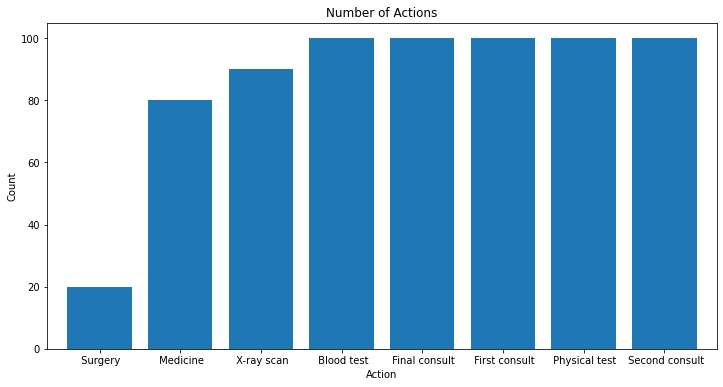

In [ ]:
temp = patients.groupby(['action'])['action'].count()
temp = temp.sort_values()

fig = plt.figure(figsize=(12,6))
ax = temp.plot(kind='bar',width=0.8)
ax.set_xticklabels(temp.index, rotation = 0)
ax.set_title('Number of Actions')
ax.set_ylabel('Count')
ax.set_xlabel('Action')
fig.show()

In [ ]:
print(temp[0],temp[-1])

20 100


### As you see in the figure above,<br>Most repeated actions are: Blood test, Consult, First Consult, Final Consult, Physical Test and Second consult ( all were repeated 100 times. they were done by all the patients) <br>Least repeated action is: Surgery (20 times)

# ج)

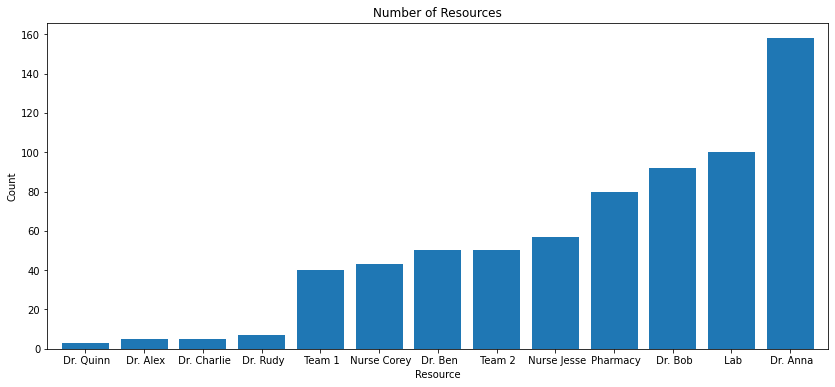

In [ ]:
temp = patients.groupby(['resource'])['resource'].count()
temp = temp.sort_values()

fig = plt.figure(figsize=(14,6))
ax = temp.plot(kind='bar',width=0.8)
ax.set_xticklabels(temp.index, rotation = 0)
ax.set_title('Number of Resources')
ax.set_ylabel('Count')
ax.set_xlabel('Resource')
fig.show()

In [ ]:
print(temp[0],temp[-1])

3 158


### As you see in the figure above,<br>Most repeated resource is: Dr. Anna (158 times) <br>Least repeated resource is: Dr. Quinn (3 times)

# Q2)

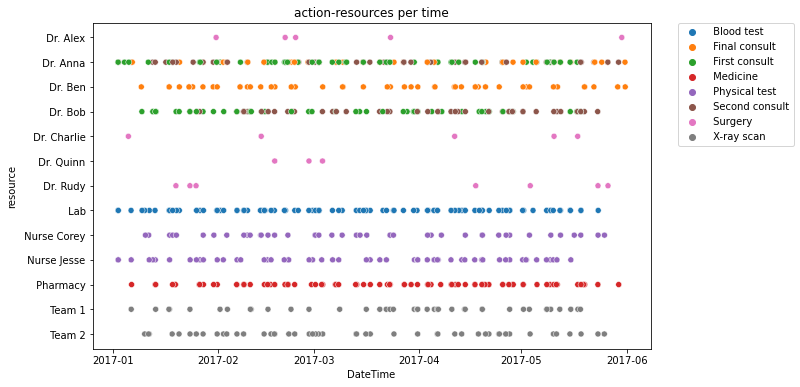

In [ ]:
plt.figure(figsize=(10,6))
plt.title('action-resources per time')
df = patients.copy()
df['res_cnt'] = df.groupby(['resource'])['resource'].transform('count')
df = df.sort_values(by='res_cnt')
sns.scatterplot(data=df, x="DateTime", y="resource", hue="action")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);

### From the figure above, it's apparent that Dr. Alex, Dr. Charlie, Dr. Quinn, and Dr. Rudy are surgeons. and Surgery is a medical procedure that happens less frequently than other medical procedures. we also understand that "Physical Test" is done by Nurse Corey & Nurse Jesse. and "X-ray scan" is done by Team1 & Team2. Dr. Bob is in charge of First & second consults, and Dr. Ben is in charge of Final consults, while Dr. Anna is in charge of all these consults. we also see that "Blood Test"s are done in the "Lab" and "Medicine" is handled in the "Pharmacy" as expected.

# Q3)

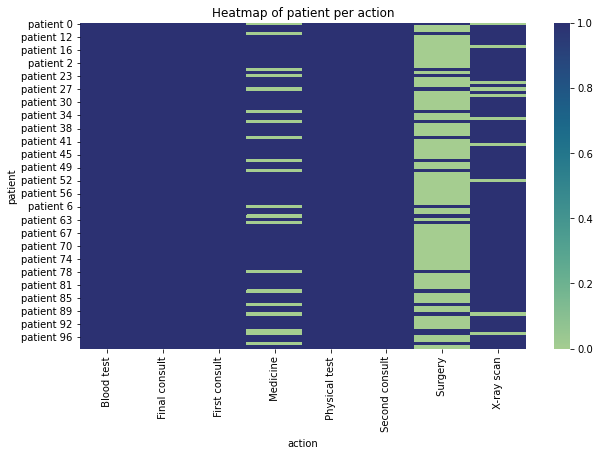

In [ ]:
tmp = pd.crosstab(df['patient'],df['action'])
plt.figure(figsize=(10,6))
sns.heatmap(tmp, cmap="crest")
plt.title('Heatmap of patient per action');

### According to the above heatmap, the following actions are not common to all cases: Medicine, Surgery, X-ray scan<br>with "Surgery" being the rarest one among these actions.<br>The following actions are common to all cases: Blood test, Final consult, First consult, Physical test, Second consult<br>these results align with our previous understanding (from the barplot of actions).

# Q4)

In [ ]:
for p in pd.unique(patients.patient):
  patients.loc[patients.patient == p , 'FirstActionTime'] = patients[patients.patient == p][patients.action == ' First consult'].iloc[0,:].DateTime 
  patients.loc[patients.patient == p , 'LastActionTime'] = patients[patients.patient == p][patients.action == ' Final consult'].iloc[0,:].DateTime 


In [ ]:
for p in patients.index:
  dur = (patients.loc[p,'DateTime'] - patients.loc[p,'FirstActionTime'])
  patients.loc[p, 'relativetime_s'] = dur.days * 24 * 3600 + dur.seconds
  dur = patients.loc[p,'LastActionTime'] - patients.loc[p,'FirstActionTime']
  patients.loc[p, 'patient_actions_duration'] = dur.days * 24 * 3600 + dur.seconds
patients.head(5)

,patient,action,resource,DateTime,FirstActionTime,LastActionTime,relativetime_s,patient_actions_duration
0,patient 0,First consult,Dr. Anna,2017-01-02 11:40:11,2017-01-02 11:40:11,2017-01-09 08:29:28,0.0,593357.0
1,patient 0,Blood test,Lab,2017-01-02 12:47:33,2017-01-02 11:40:11,2017-01-09 08:29:28,4042.0,593357.0
2,patient 0,Physical test,Nurse Jesse,2017-01-02 12:53:50,2017-01-02 11:40:11,2017-01-09 08:29:28,4419.0,593357.0
3,patient 0,Second consult,Dr. Anna,2017-01-02 16:21:06,2017-01-02 11:40:11,2017-01-09 08:29:28,16855.0,593357.0
4,patient 0,Surgery,Dr. Charlie,2017-01-05 13:23:09,2017-01-02 11:40:11,2017-01-09 08:29:28,265378.0,593357.0


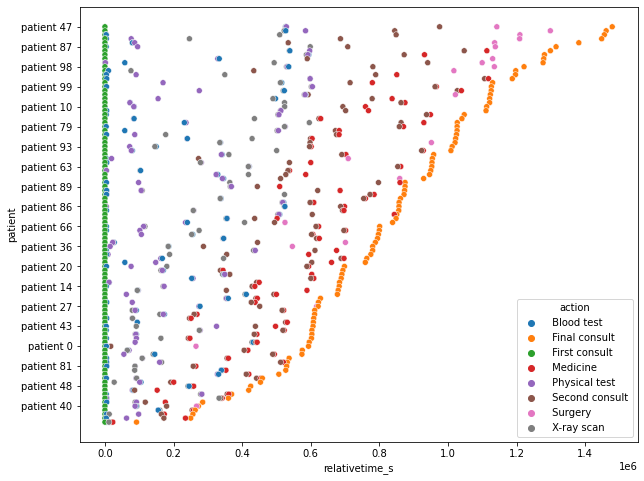

In [ ]:
ordered = patients.sort_values(by=['patient_actions_duration'], ascending = False)
plt.figure(figsize=(10,8))
ax = sns.scatterplot(x=ordered['relativetime_s'], y=ordered['patient'], hue=ordered['action'])
plt.yticks(np.arange(0,100, 5));
plt.show()

### I showed the patient numbers on the y-axis labels(1 label per 5 patients. the between patients aren't shown on the y-axis to avoid clutter).<br> we can see the order of actions per patient in the above figure. Not all patients experience all the actions and they don't necessarily follow the same order of actions but, it's apparent that the first action of each patient is "First consult" and the last action of each patient is "Final consult" and all of them do these actions. 

# Q5)

In [ ]:
temp = patients[['action','patient']].copy()
temp.groupby(['action'])['patient'].count()

action
 Blood test        100
 Final consult     100
 First consult     100
 Medicine           80
 Physical test     100
 Second consult    100
 Surgery            20
 X-ray scan         90
Name: patient, dtype: int64

## I wrote down the above numbers on the diagram, and inserted the edited diagram here.
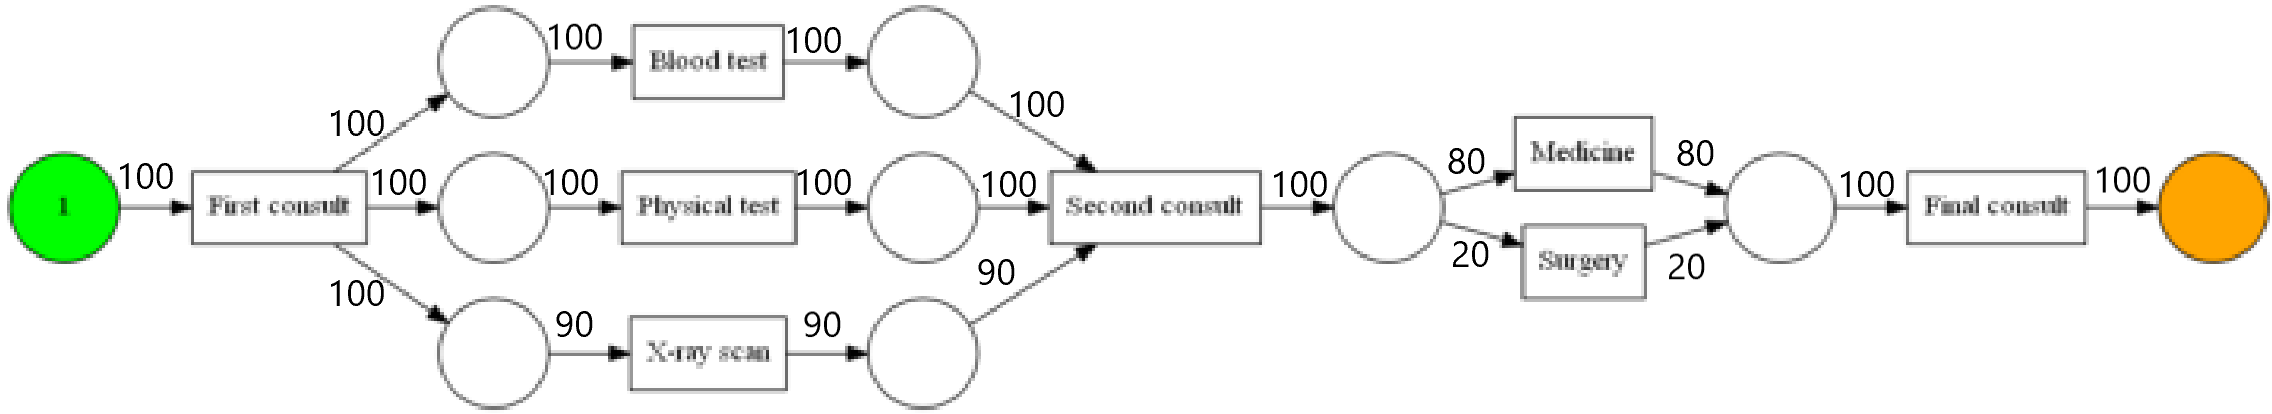

### all 100 patients do the "First consult", "Second consult" and "Third consult". After the first consult there are 3 possible actions. Among these 100 patients, 90 of them do "X-ray scan", while all of them do "Blood Test" and "Physical Test". then all of them do the "Second consult". there are two possible actions between the second & final consult ( medicine & surgery). after the second consult, 80 of them do "Medicine", while 20 of them do "Surgery". then all 100 of the patients do the "Final consult".<br>So, we understand that all the patients do "First consult", "Blood Test", "Physical Test", "Second consult" and "Final consult".

# Q6)

In [ ]:
pids = patients.loc[patients.action == ' Surgery','patient']
temp1 = patients.loc[patients.patient.isin(pids) & ((patients.action ==' Second consult')),['patient','action','DateTime']].reset_index(drop=True)
temp2 = patients.loc[patients.patient.isin(pids) & ((patients.action ==' Surgery')),['patient','action','DateTime']].reset_index(drop=True)

values = pd.DataFrame(columns=['TimeDifference_m'])
dur = temp2['DateTime'] - temp1['DateTime']
duration = (dur.dt.days*24*3600 + dur.dt.seconds)/60
for i in duration:
  values = values.append({'TimeDifference_m': i},ignore_index= True)

In [ ]:
print("Mean: ", values.mean(), "Std: ",values.std())

Mean:  TimeDifference_m    5654.834167
dtype: float64 Std:  TimeDifference_m    2743.473608
dtype: float64


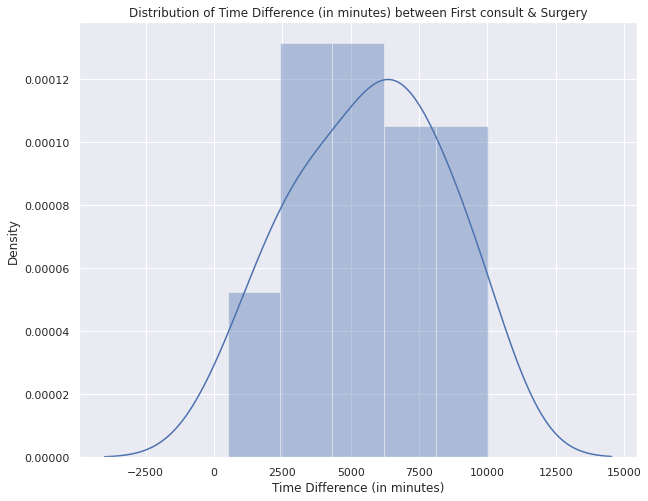

In [ ]:
sns.set(rc={'figure.figsize':(10,8)})
plt.title('Distribution of Time Difference (in minutes) between First consult & Surgery')
plt.xlabel('Time Difference (in minutes)')
sns.distplot(values , bins = 5);


### According to the figure above, we see that the distribution of time between first consult and surgery, have a unimodal distribution and follows a guassian-like distribution. the mean of these values is between 5000 & 6000 (exactly 5654.834167) and the standard deviation of these values is 2743.473608.

# **Part 2) Business Analytic** 

In [ ]:
trans = pd.read_csv('transaction.csv')
trans

,transaction_id,product_id,customer_id,transaction_date,online_order,product_size
0,1,2,2950,2017-02-25,0.0,medium
1,2,3,3120,2017-05-21,1.0,large
2,3,37,402,2017-10-16,0.0,medium
3,4,88,3135,2017-08-31,0.0,medium
4,5,78,787,2017-10-01,1.0,large
...,...,...,...,...,...,...
19995,19996,51,1018,2017-06-24,1.0,medium
19996,19997,41,127,2017-11-09,1.0,medium
19997,19998,87,2284,2017-04-14,1.0,medium
19998,19999,6,2764,2017-07-03,0.0,medium


In [ ]:
trans.dtypes

transaction_id        int64
product_id            int64
customer_id           int64
transaction_date     object
online_order        float64
product_size         object
dtype: object

In [ ]:
trans.transaction_date = pd.to_datetime(trans.transaction_date)

In [ ]:
trans.isna().sum()

transaction_id        0
product_id            0
customer_id           0
transaction_date      0
online_order        360
product_size        197
dtype: int64

# Q1)

## الف) 

In [ ]:
def preprocess_retention(df):
  start_date = df.groupby('customer_id')['transaction_date'].min()
  start_date = start_date.rename("start_day")
  df1 = pd.merge(df, start_date, left_on='customer_id', right_index=True)
  df1['days_since_start'] = (df1['transaction_date'] - df1['start_day']).dt.days
  df1['start_month'] = df1['start_day'].values.astype('datetime64[M]')
  df1['months_since_start'] = np.floor((df1['transaction_date'] - df1['start_day']) / np.timedelta64(1, 'M'))
  return df1


In [ ]:
trans1 = preprocess_retention(trans)
trans1.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,product_size,start_day,days_since_start,start_month,months_since_start
0,1,2,2950,2017-02-25,0.0,medium,2017-02-25,0,2017-02-01,0.0
11064,11065,1,2950,2017-10-16,0.0,medium,2017-02-25,233,2017-02-01,7.0
18922,18923,62,2950,2017-04-26,0.0,medium,2017-02-25,60,2017-02-01,1.0
1,2,3,3120,2017-05-21,1.0,large,2017-01-20,121,2017-01-01,3.0
6861,6862,4,3120,2017-10-05,0.0,medium,2017-01-20,258,2017-01-01,8.0


In [ ]:
trans1.groupby('months_since_start')['customer_id'].nunique()/ trans1['customer_id'].nunique()

months_since_start
0.0     1.000000
1.0     0.362908
2.0     0.384373
3.0     0.370922
4.0     0.367487
5.0     0.349456
6.0     0.363194
7.0     0.342015
8.0     0.311963
9.0     0.270464
10.0    0.181740
11.0    0.082999
Name: customer_id, dtype: float64

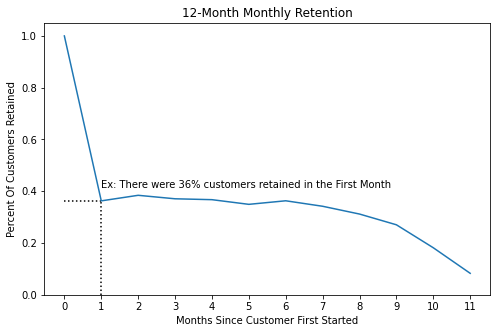

In [ ]:
whole_retention = trans1.groupby('months_since_start')['customer_id'].nunique() / trans1['customer_id'].nunique()
plt.figure(figsize=(8,5))
plt.plot(whole_retention)
plt.title("12-Month Monthly Retention")
plt.xlabel("Months Since Customer First Started")
plt.ylabel("Percent Of Customers Retained")
plt.xticks(np.arange(0,12,1))
plt.ylim(0,1.05)

plt.hlines(y=whole_retention.loc[1], xmin=0, xmax=1, linestyles='dotted')
plt.vlines(x=1, ymin=0, ymax=whole_retention.loc[1], linestyles='dotted')
plt.text(s=("Ex: There were {:.0%} customers retained in the First Month".format(whole_retention.loc[1])),x=1, y=whole_retention.loc[1] + .05);

### We see that, only 36% of customers remain users of the shop after the first month (since they first bought something from the shop). which means we have a 74% loss in the number of customers during the first month. after that, the number of customers doesn't experience a siginificant loss till their 6th month of use. then after the 7th month, the number of customers slowly decrease until only 8.2999% of customers remain after a whole year since they bought something from the shop.<br>some of the things we can do to improve the shop's performance are: <br>- offer more discounts and advertisments to the new arrived customers to make them excited about the shop<br>- Looking into  the shop's customer service or delivery or support. since the customers don't comeback after their first purchase, there's   probably something wrong with these departments.

## ب)

In [ ]:
trans2 = trans[trans['online_order'].notna()].reset_index(drop=True)
trans2.online_order = trans2.online_order.astype('int') 
trans2.online_order = trans2.online_order.astype(bool)
trans2_online = trans2[trans2.online_order]
trans2_offline = trans2[~trans2.online_order]
trans2_online = preprocess_retention(trans2_online)
trans2_offline = preprocess_retention(trans2_offline)

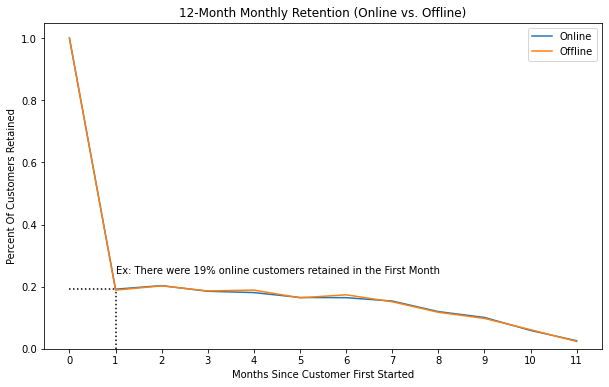

In [ ]:
whole_retention_online = trans2_online.groupby('months_since_start')['customer_id'].nunique() / trans2_online['customer_id'].nunique()
whole_retention_offline = trans2_offline.groupby('months_since_start')['customer_id'].nunique() / trans2_offline['customer_id'].nunique()
plt.figure(figsize=(10,6))
plt.plot(whole_retention_online)
plt.plot(whole_retention_offline)
plt.legend(['Online','Offline'])
plt.title("12-Month Monthly Retention (Online vs. Offline)")
plt.xlabel("Months Since Customer First Started")
plt.ylabel("Percent Of Customers Retained")
plt.xticks(np.arange(0,12,1))
plt.ylim(0,1.05)

plt.hlines(y=whole_retention_online.loc[1], xmin=0, xmax=1, linestyles='dotted')
plt.vlines(x=1, ymin=0, ymax=whole_retention_online.loc[1], linestyles='dotted')
plt.text(s=("Ex: There were {:.0%} online customers retained in the First Month".format(whole_retention_online.loc[1])),x=1, y=whole_retention_online.loc[1] + .05);

### dividing the retention rate of online customers vs. offline customers, show almost the same pattern as the retention rate of all customers (the only difference is that the retention rate after the first month here is lower than the whole retention rate). and these 2 retention rates are almost identical. 

In [ ]:
whole_retention_offline

months_since_start
0.0     1.000000
1.0     0.188976
2.0     0.202604
3.0     0.186251
4.0     0.188976
5.0     0.164143
6.0     0.173834
7.0     0.151423
8.0     0.117505
9.0     0.097820
10.0    0.061478
11.0    0.023622
Name: customer_id, dtype: float64

In [ ]:
whole_retention_online

months_since_start
0.0     1.000000
1.0     0.191876
2.0     0.203395
3.0     0.185208
4.0     0.180964
5.0     0.165202
6.0     0.164595
7.0     0.153683
8.0     0.119733
9.0     0.100940
10.0    0.059109
11.0    0.025765
Name: customer_id, dtype: float64

## ج)

In [ ]:
trans3 = trans[trans['product_size'].notna()]
trans3['product_size'] = pd.Categorical(trans3.product_size, categories=['small','medium','large'], ordered=True)
trans3_small = trans3[trans3.product_size == 'small'].reset_index(drop=True)
trans3_medium = trans3[trans3.product_size == 'medium'].reset_index(drop=True)
trans3_large = trans3[trans3.product_size == 'large'].reset_index(drop=True)
trans3_small = preprocess_retention(trans3_small)
trans3_medium = preprocess_retention(trans3_medium)
trans3_large = preprocess_retention(trans3_large)

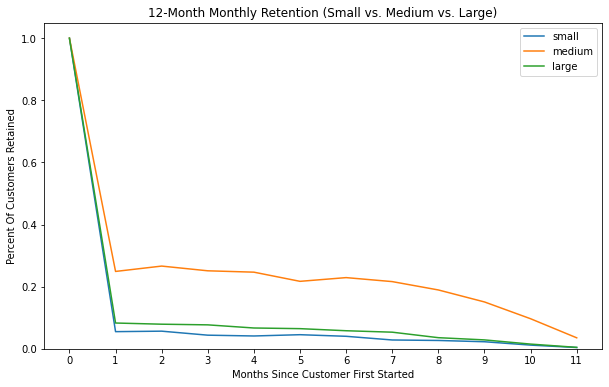

In [ ]:
whole_retention_small = trans3_small.groupby('months_since_start')['customer_id'].nunique() / trans3_small['customer_id'].nunique()
whole_retention_medium = trans3_medium.groupby('months_since_start')['customer_id'].nunique() / trans3_medium['customer_id'].nunique()
whole_retention_large = trans3_large.groupby('months_since_start')['customer_id'].nunique() / trans3_large['customer_id'].nunique()
plt.figure(figsize=(10,6))
plt.plot(whole_retention_small)
plt.plot(whole_retention_medium)
plt.plot(whole_retention_large)
plt.legend(['small','medium','large'])
plt.title("12-Month Monthly Retention (Small vs. Medium vs. Large)")
plt.xlabel("Months Since Customer First Started")
plt.ylabel("Percent Of Customers Retained")
plt.xticks(np.arange(0,12,1))
plt.ylim(0,1.05);

### in the above figure, we see the retention rates' pattern of customers divided by the size of the product they purchased. very few of the customers who bought "small" and "large" products, bought the products with the same size after their first purchase. meaning, they rarely bought "small" and "large" products again, to the extent that about 2% of these customers bought these products after a whole year once more.<br>In contrast to these 2 products, customers who bought "medium" products follow almost the same retention pattern as the Whole retention rate.<br>some of the things we can do here to improve the performance of the shop are:<br>- look into the details of small-sized and large-sized products. maybe there's something wrong with the delivery or price of these products that doesn't make customers to order them again.<br>- one other explanation could be that people usually need medium-sized produts or most products are medium-sized and there's nothing wrong with other size products.

In [ ]:
whole_retention_small

months_since_start
0.0     0.358101
1.0     0.109391
2.0     0.119711
3.0     0.119195
4.0     0.106295
5.0     0.114035
6.0     0.113519
7.0     0.101651
8.0     0.090299
9.0     0.085139
10.0    0.058308
11.0    0.026832
Name: customer_id, dtype: float64

In [ ]:
whole_retention_medium

months_since_start
0.0     0.768196
1.0     0.266296
2.0     0.277404
3.0     0.260158
4.0     0.267758
5.0     0.244958
6.0     0.254312
7.0     0.249050
8.0     0.227419
9.0     0.190588
10.0    0.128617
11.0    0.057293
Name: customer_id, dtype: float64

In [ ]:
whole_retention_large

months_since_start
0.0     0.395114
1.0     0.119629
2.0     0.132266
3.0     0.133951
4.0     0.125527
5.0     0.127633
6.0     0.137742
7.0     0.118366
8.0     0.110783
9.0     0.099410
10.0    0.062342
11.0    0.025695
Name: customer_id, dtype: float64

# Q2)

In [ ]:
def cohort_table(df):
  df['order_month'] = df['transaction_date'].dt.to_period('M')
  df['cohort'] = df.groupby('customer_id')['transaction_date'].transform('min').dt.to_period('M') 
  df_cohort = df.groupby(['cohort', 'order_month']).agg(n_customers=('customer_id', 'nunique')).reset_index(drop=False)
  df_cohort['period_number'] = (df_cohort.order_month - df_cohort.cohort).apply(attrgetter('n'))
  cohort_pivot = df_cohort.pivot_table(index = 'cohort',columns = 'period_number',values = 'n_customers')
  cohort_size = cohort_pivot.iloc[:,0]
  retention_matrix = cohort_pivot.divide(cohort_size, axis = 0)
  return df_cohort,cohort_size,retention_matrix

In [ ]:
df_cohort,cohort_size,retention_matrix = cohort_table(trans)

In [ ]:
df_cohort

,cohort,order_month,n_customers,period_number
0,2017-01,2017-01,1354,0
1,2017-01,2017-02,486,1
2,2017-01,2017-03,508,2
3,2017-01,2017-04,509,3
4,2017-01,2017-05,502,4
...,...,...,...,...
73,2017-10,2017-11,6,1
74,2017-10,2017-12,8,2
75,2017-11,2017-11,13,0
76,2017-11,2017-12,5,1


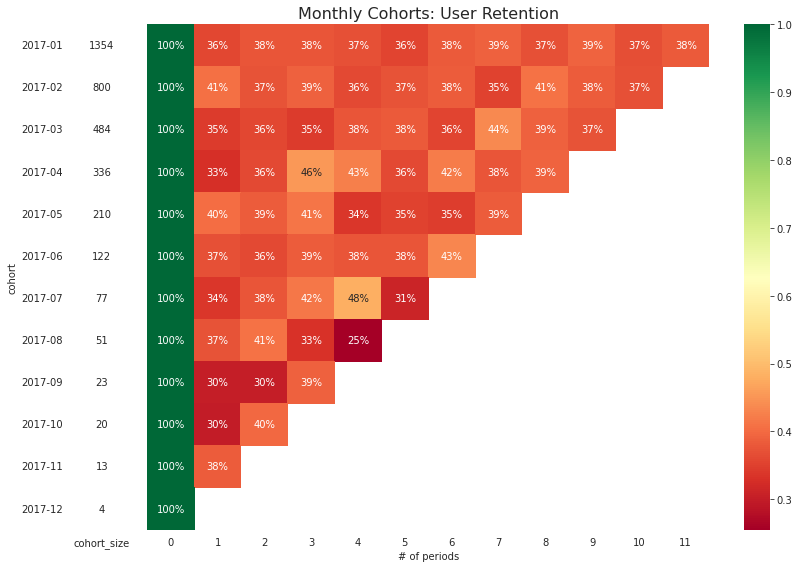

In [ ]:
with sns.axes_style("white"):
    fig, ax = plt.subplots(1, 2, figsize=(12, 8), sharey=True, gridspec_kw={'width_ratios': [1, 11]})
    # retention matrix
    sns.heatmap(retention_matrix, mask=retention_matrix.isnull(), annot=True, fmt='.0%', cmap='RdYlGn', ax=ax[1])
    ax[1].set_title('Monthly Cohorts: User Retention', fontsize=16)
    ax[1].set(xlabel='# of periods', ylabel='')

    cohort_size_df = pd.DataFrame(cohort_size).rename(columns={0: 'cohort_size'})
    white_cmap = mcolors.ListedColormap(['white'])
    sns.heatmap(cohort_size_df, annot=True, cbar=False, fmt='g', cmap=white_cmap, ax=ax[0])

    fig.tight_layout()

### In the above figure, we see the heatmap of the cohort table.<br> Customers fall drastically after the first month since their first purchase (no matter which month they first purchased).<br> we see that the number of customers who joined in January is significantly larger than the the number of customers who joined in other months (1354 customers joined in January). this information is helpful in guiding us to apply more efficient techniques for popularizing our shop in January to increase our profit, since more customers buy from the shop in this month.<br> we see that only 25% of customers who joined in the 8th month (August), stay till the end of year. which is the lowest retention rate at the end of the year between all months.<br> the highest retention rates are:<br>- 46% in August for the customers who have joined in April.<br>- 48% in November for the customers who have joined in July.<br>the best retention rate at the end of year(December) belongs to the customers who have joined in June(6th month of year).<br> by a look at the retention rate of cutomers after one month since they joined, we see that month9,10 and after them month2, need more improvement. we need to improve the performance of our shop in these months.